In [1]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load Dataset
max_features = 10000   # Vocabulary size (top 10,000 words)
maxlen = 200           # Maximum review length

print("Loading IMDb dataset...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(f"Training samples: {len(x_train)}, Test samples: {len(x_test)}")

Loading IMDb dataset...
Training samples: 25000, Test samples: 25000


In [3]:
# Step 3: Preprocess the data
print("Padding sequences...")
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

Padding sequences...


In [4]:
# Step 4: Build the model
print("Building RNN model...")
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=64, input_length=maxlen))
model.add(SimpleRNN(64))   # RNN Layer
model.add(Dense(1, activation='sigmoid'))

Building RNN model...


In [5]:
# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 648,321
Trainable params: 648,321
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
# Step 6: Train the model
print("Training the model...")
history = model.fit(x_train, y_train,
                    epochs=3,
                    batch_size=64,
                    validation_split=0.2)

Training the model...
Epoch 1/3
313/313 [==============================] - 11s 34ms/step - loss: 0.6074 - accuracy: 0.6445 - val_loss: 0.4814 - val_accuracy: 0.7720
Epoch 2/3
313/313 [==============================] - 10s 33ms/step - loss: 0.4318 - accuracy: 0.8025 - val_loss: 0.4423 - val_accuracy: 0.8028
Epoch 3/3
313/313 [==============================] - 10s 33ms/step - loss: 0.2106 - accuracy: 0.9194 - val_loss: 0.4845 - val_accuracy: 0.8070


In [7]:
# Step 7: Evaluate the Model
print("Evaluating the model...")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

Evaluating the model...

Test Accuracy: 0.8086
Test Loss: 0.4748


In [8]:
# Step 8: Make a Prediction
word_index = imdb.get_word_index()

# Function to decode review back to text
reverse_word_index = {value: key for key, value in word_index.items()}
def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in encoded_review])

# Pick one review from test set
sample_review = x_test[1]
decoded = decode_review(sample_review)
print("\nSample Review (decoded):")
print(decoded)

prediction = model.predict(sample_review.reshape(1, -1))[0][0]
print(f"\nPredicted Sentiment Score: {prediction:.4f}")
print("Predicted Label:", "Positive 😊" if prediction > 0.5 else "Negative 😞")



Sample Review (decoded):
psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the ? moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual ? and desperation be patient ? up the atmosphere and pay attention to the wonderfully written script br br i praise robert altman this is one of his many films that deals with unconventional fascinating subject matter this film is disturbing but it's sincere and it's sure to ? a strong emotional response from the viewer if you want to see an unusual film some migh

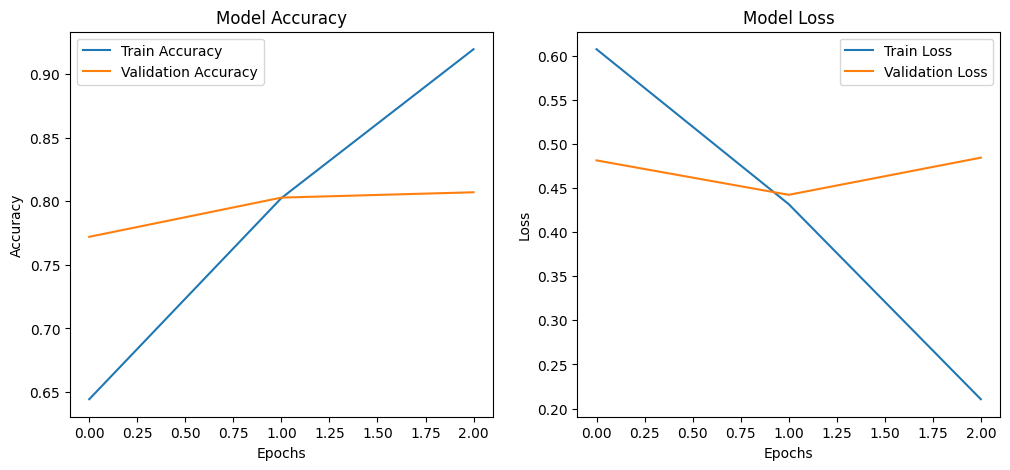

In [9]:
# Step 9: Plot Training History
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
``